In [9]:
#adjust screenwidth:
from IPython.core.display import HTML

HTML("<style>.container { width:98% !important; }</style>")

In [215]:
import numpy as np
from scipy import stats
import pandas as pd
import pandas_datareader as pdr
import pandasdmx as ps
import widukind_sdmx as wd

import matplotlib.pyplot as plt

In [199]:
def make_bins(series, num_bins=2, bins=None, labels=None):
    minval = series.min()
    maxval = series.max()+1 # just to be sure it's also included
    if bins != None:
        bins = np.array(bins)
        bins = np.sort(np.append(bins[(bins>=minval) & (bins<=maxval)],[minval,maxval]))
    else:
        bins = np.linspace(minval,maxval,num_bins+1)
    binned = pd.cut(series,bins,include_lowest=True, labels=labels)
    return binned

# pandas datareader

In [97]:
from pandas_datareader import wb

countries = wb.get_countries()
indicators = wb.get_indicators()

In [50]:
countries

,adminregion,capitalCity,iso3c,incomeLevel,iso2c,latitude,lendingType,longitude,name,region
0,,Oranjestad,ABW,High income,AW,12.516700,Not classified,-70.016700,Aruba,Latin America & Caribbean
1,South Asia,Kabul,AFG,Low income,AF,34.522800,IDA,69.176100,Afghanistan,South Asia
2,,,AFR,Aggregates,A9,NaN,Aggregates,NaN,Africa,Aggregates
3,Sub-Saharan Africa (excluding high income),Luanda,AGO,Upper middle income,AO,-8.811550,IBRD,13.242000,Angola,Sub-Saharan Africa
4,Europe & Central Asia (excluding high income),Tirane,ALB,Upper middle income,AL,41.331700,IBRD,19.817200,Albania,Europe & Central Asia
5,,Andorra la Vella,AND,High income,AD,42.507500,Not classified,1.521800,Andorra,Europe & Central Asia
6,,,ANR,Aggregates,L5,NaN,Aggregates,NaN,Andean Region,Aggregates
7,,,ARB,Aggregates,1A,NaN,Aggregates,NaN,Arab World,Aggregates
8,,Abu Dhabi,ARE,High income,AE,24.476400,Not classified,54.370500,United Arab Emirates,Middle East & North Africa
9,Latin America & Caribbean (excluding high income),Buenos Aires,ARG,Upper middle income,AR,-34.611800,IBRD,-58.417300,Argentina,Latin America & Caribbean


In [183]:
indicators[indicators.source=='World Development Indicators']

,id,name,source,sourceNote,sourceOrganization,topics
1020,AG.AGR.TRAC.NO,"Agricultural machinery, tractors",World Development Indicators,Agricultural machinery refers to the number of...,"b'Food and Agriculture Organization, electroni...",Agriculture & Rural Development
1024,AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...,World Development Indicators,Fertilizer consumption measures the quantity o...,"b'Food and Agriculture Organization, electroni...",Agriculture & Rural Development
1025,AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...,World Development Indicators,Fertilizer consumption measures the quantity o...,"b'Food and Agriculture Organization, electroni...",Agriculture & Rural Development
1043,AG.LND.AGRI.K2,Agricultural land (sq. km),World Development Indicators,Agricultural land refers to the share of land ...,"b'Food and Agriculture Organization, electroni...",Agriculture & Rural Development ; Climate Ch...
1044,AG.LND.AGRI.ZS,Agricultural land (% of land area),World Development Indicators,Agricultural land refers to the share of land ...,"b'Food and Agriculture Organization, electroni...",Agriculture & Rural Development ; Climate Ch...
1045,AG.LND.ARBL.HA,Arable land (hectares),World Development Indicators,Arable land (in hectares) includes land define...,"b'Food and Agriculture Organization, electroni...",Agriculture & Rural Development
1046,AG.LND.ARBL.HA.PC,Arable land (hectares per person),World Development Indicators,Arable land (hectares per person) includes lan...,"b'Food and Agriculture Organization, electroni...",Agriculture & Rural Development
1047,AG.LND.ARBL.ZS,Arable land (% of land area),World Development Indicators,Arable land includes land defined by the FAO a...,"b'Food and Agriculture Organization, electroni...",Agriculture & Rural Development ; Climate Ch...
1050,AG.LND.CREL.HA,Land under cereal production (hectares),World Development Indicators,Land under cereal production refers to harvest...,"b'Food and Agriculture Organization, electroni...",Agriculture & Rural Development
1052,AG.LND.CROP.ZS,Permanent cropland (% of land area),World Development Indicators,Permanent cropland is land cultivated with cro...,"b'Food and Agriculture Organization, electroni...",Agriculture & Rural Development


In [184]:
year=2000
# search DB
wb.search('gdp.*cap')

gdp = wb.download(country='all',indicator='NY.GDP.PCAP.PP.KD', start=year, end=year)

wb.search('agr')

agr = wb.download(country='all',indicator='AG.YLD.CREL.KG', start=year, end=year)

gdp_agr = gdp.join(agr).dropna().rename(columns={'NY.GDP.PCAP.PP.KD':'gdp', 'AG.YLD.CREL.KG':'agr'})
gdp_agr.count()

gdp    215
agr    215
dtype: int64

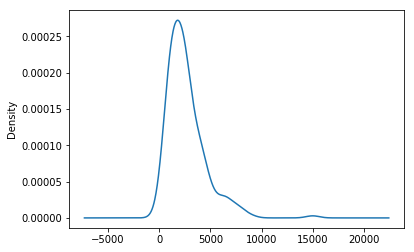

In [220]:
gdp_agr.agr.plot(kind='kde')
plt.show()

In [286]:
n=20
pd.crosstab(gdp_agr.gdp_bins.iloc[:n],gdp_agr.agr_bins.iloc[:n])

agr_bins,"[130.7, 2800]","(2800, 15001]"
gdp_bins,,
"[518.498, 10000]",7,4
"(10000, 108108.421]",4,5


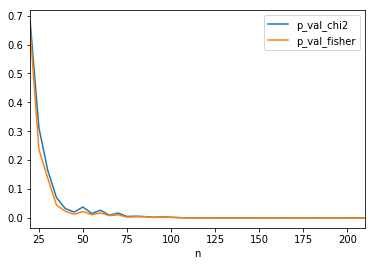

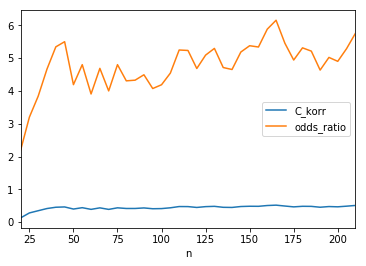

In [284]:
gdp_agr['gdp_bins'] = make_bins(gdp_agr.gdp, bins=[10000])
gdp_agr['agr_bins'] = make_bins(gdp_agr.agr,bins=[2800])

df = pd.DataFrame(columns=['n','C_korr','odds_ratio','p_val_chi2','p_val_fisher'])

for n in range(20,len(gdp_agr),5):

    cross = pd.crosstab(gdp_agr.gdp_bins.iloc[:n],gdp_agr.agr_bins.iloc[:n])

    k = min(cross.shape)

    chi2, p_val_chi2, dof, expected = stats.chi2_contingency(cross)
    C_korr = np.sqrt( k/(k-1.) * chi2/(n+chi2) ) 

    odds_ratio, p_val_fisher = stats.fisher_exact(cross)

    df = df.append(dict(zip(list(df.columns),[n,C_korr,odds_ratio,p_val_chi2,p_val_fisher])), ignore_index=True)

df.iloc[:,[0,3,4]].plot(x='n')
plt.show()
df.iloc[:,[0,1,2]].plot(x='n')
plt.show()

In [208]:
stats.chisquare(gdp_agr.gdp_bins,gdp_agr.agr_bins)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [221]:
chi2, p_val, dof, expected = stats.chi2_contingency(cross)
print(chi2,p_val)
stats.fisher_exact(cross)

24.6195450243 6.98397829574e-07


(4.7629399585921322, 4.542195349628268e-07)

# widukind

In [19]:
# Widukind Agencies: ECB, INSEE, EUROSTAT, BIS, IMF, OECD, ESRI, FED
sdmx = wd.Request(agency='ECB')

In [20]:
wd.Request?

In [21]:
sdmx.data()

AttributeError: 'Request' object has no attribute '_get_reader'

In [5]:
data_response = sdmx.get(resource_type='data', resource_id="IPCH-2015-FR-COICOP", key={'FREQ': 'A', 'PRODUIT': '00', 'NATURE': 'INDICE'})

AttributeError: 'Request' object has no attribute '_get_reader'

In [ ]:
df = data_response.write()